In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
import sklearn

In [ ]:
#run spark session
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
#start the session
spark= SparkSession.builder.appName("netflix_pipeline").getOrCreate()

In [ ]:
schema = StructType([
    StructField("show_id", StringType(), True),
    StructField("type", StringType(), True),
    StructField("title", StringType(), True),
    StructField("director", StringType(), True),
    StructField("cast", StringType(), True),
    StructField("country", StringType(), True),
    StructField("date_added", StringType(), True),
    StructField("release_year", IntegerType(), True),
    StructField("rating", StringType(), True),
    StructField("duration", StringType(), True),
    StructField("listed_in", StringType(), True),
    StructField("description", StringType(), True)
])


In [ ]:
# Load Netflix data
df = spark.read.csv("netflix_titles.csv", schema=schema, header=True)

# Filter: Only movies released after 2015 with rating 'TV-MA'
filtered_df = df.filter((df.type == "Movie") & (df.release_year > 2015) & (df.rating == "TV-MA"))

# Show results
filtered_df.select("title", "release_year", "rating", "country").show(truncate=False)


+-----------------------------------------------------+------------+------+-----------------------+
|title                                                |release_year|rating|country                |
+-----------------------------------------------------+------------+------+-----------------------+
|Je Suis Karl                                         |2021        |TV-MA |Germany, Czech Republic|
|Europe's Most Dangerous Man: Otto Skorzeny in Spain  |2020        |TV-MA |NULL                   |
|The Father Who Moves Mountains                       |2021        |TV-MA |NULL                   |
|The Stronghold                                       |2021        |TV-MA |NULL                   |
|Omo Ghetto: the Saga                                 |2020        |TV-MA |Nigeria                |
|Prey                                                 |2021        |TV-MA |NULL                   |
|Paradise Hills                                       |2019        |TV-MA |Spain, United States   |


In [ ]:
#drop duplicates
df = df.dropDuplicates()
print(df)
#fill the null values
df= df.fillna({"country": "unknown", "rating": "notrated"})

DataFrame[show_id: string, type: string, title: string, director: string, cast: string, country: string, date_added: string, release_year: int, rating: string, duration: string, listed_in: string, description: string]


In [ ]:
#EDA
#Count by Type (Movies vs TV Shows)
df.groupby("type").count().show()

+-------------+-----+
|         type|count|
+-------------+-----+
|      TV Show| 2676|
|        Movie| 6131|
|         NULL|    1|
|William Wyler|    1|
+-------------+-----+



In [ ]:
#Top 10 Countries with Most Titles
from pyspark.sql.functions import count, desc
df.groupby("country").agg(count("*").alias("total_titles")).orderBy(desc("total_titles")).show(10)

+--------------+------------+
|       country|total_titles|
+--------------+------------+
| United States|        2805|
|         India|         972|
|       unknown|         832|
|United Kingdom|         419|
|         Japan|         245|
|   South Korea|         199|
|        Canada|         181|
|         Spain|         145|
|        France|         123|
|        Mexico|         110|
+--------------+------------+
only showing top 10 rows



In [ ]:
#trend of release year
df.groupby("release_year").agg(count("*").alias("num_titles")).orderBy(desc("num_titles")).show(10)

+------------+----------+
|release_year|num_titles|
+------------+----------+
|        2018|      1145|
|        2017|      1030|
|        2019|      1026|
|        2020|       952|
|        2016|       901|
|        2021|       589|
|        2015|       559|
|        2014|       352|
|        2013|       288|
|        2012|       237|
+------------+----------+
only showing top 10 rows



In [ ]:
#advanced insights
#Top directors by number of movies
df.groupby("director").agg(count("*").alias("top_directors")).orderBy(desc("top_directors")).show(10)

+--------------------+-------------+
|            director|top_directors|
+--------------------+-------------+
|                NULL|         2636|
|       Rajiv Chilaka|           19|
|Raúl Campos, Jan ...|           18|
|        Marcus Raboy|           16|
|         Suhas Kadav|           16|
|           Jay Karas|           14|
| Cathy Garcia-Molina|           13|
|     Youssef Chahine|           12|
|     Martin Scorsese|           12|
|         Jay Chapman|           12|
+--------------------+-------------+
only showing top 10 rows



In [ ]:
#popular genres listedin
from pyspark.sql.functions import split, explode, trim, col
genres = df.withColumn("genre", explode(split(col("listed_in"), ","))) \
           .withColumn("genre", trim(col("genre")))

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
import sklearn

#run spark session
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
#start the session
spark= SparkSession.builder.appName("netflix_pipeline").getOrCreate()

schema = StructType([
    StructField("show_id", StringType(), True),
    StructField("type", StringType(), True),
    StructField("title", StringType(), True),
    StructField("director", StringType(), True),
    StructField("cast", StringType(), True),
    StructField("country", StringType(), True),
    StructField("date_added", StringType(), True),
    StructField("release_year", IntegerType(), True),
    StructField("rating", StringType(), True),
    StructField("duration", StringType(), True),
    StructField("listed_in", StringType(), True),
    StructField("description", StringType(), True)
])

#load the dataset
df= spark.read.csv("netflix_titles.csv", schema=schema, header= True)
# Filter: Only movies released after 2015 with rating 'TV-MA'
filtered_df = df.filter((df.type == "Movie") & (df.release_year > 2015) & (df.rating == "TV-MA"))
#show results
filtered_df.select("title", "release_year", "rating", "country").show(truncate= False)

+-----------------------------------------------------+------------+------+-----------------------+
|title                                                |release_year|rating|country                |
+-----------------------------------------------------+------------+------+-----------------------+
|Je Suis Karl                                         |2021        |TV-MA |Germany, Czech Republic|
|Europe's Most Dangerous Man: Otto Skorzeny in Spain  |2020        |TV-MA |NULL                   |
|The Father Who Moves Mountains                       |2021        |TV-MA |NULL                   |
|The Stronghold                                       |2021        |TV-MA |NULL                   |
|Omo Ghetto: the Saga                                 |2020        |TV-MA |Nigeria                |
|Prey                                                 |2021        |TV-MA |NULL                   |
|Paradise Hills                                       |2019        |TV-MA |Spain, United States   |


In [ ]:
#popular genres
from pyspark.sql.functions import explode, split, trim, desc

genres = df.withColumn("genre", explode(split(col("listed_in"), ","))) \
           .withColumn("genre", trim(col("genre")))

genres.groupBy("genre").count().orderBy(desc("count")).show(10)

+--------------------+-----+
|               genre|count|
+--------------------+-----+
|International Movies| 2748|
|              Dramas| 2419|
|            Comedies| 1670|
|International TV ...| 1350|
|       Documentaries|  866|
|  Action & Adventure|  857|
|           TV Dramas|  762|
|  Independent Movies|  751|
|Children & Family...|  641|
|     Romantic Movies|  616|
+--------------------+-----+
only showing top 10 rows



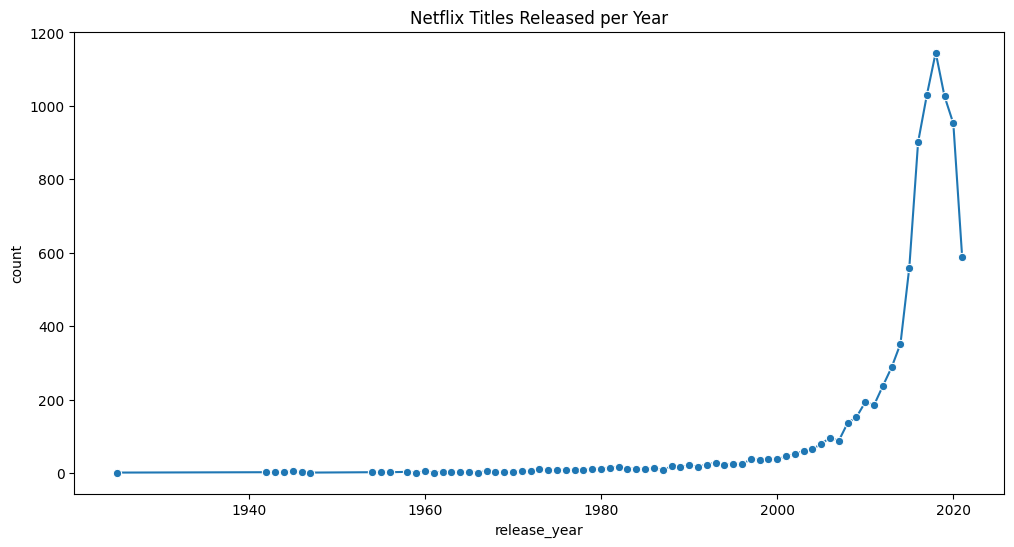

In [ ]:
#convert the results to pandas to create visualizations
releases_per_year= df.groupby("release_year").count().orderBy("release_year")
pdf= releases_per_year.toPandas()
plt.figure(figsize=(12,6))
sns.lineplot(data=pdf, x="release_year", y="count", marker="o")
plt.title("Netflix Titles Released per Year")
plt.show()

In [ ]:
#save filtered movies
from pyspark.sql.functions import count, desc
filtered_df.write.mode("overwrite").csv("./output/filtered_movies", header= True)
# Save top countries
df.groupBy("country").agg(count("*").alias("total_titles")) \
  .orderBy(desc("total_titles")) \
  .write.mode("overwrite").csv("./output/top_countries", header=True)